# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
data = pd.read_csv('data.csv')
print(data)

   1   2   3   4   5   6   7   8   9   ans
0  1   1   1   1   1   1   0   0   0     6
1  0   1   1   0   0   0   1   0   0     3
2  1   1   0   1   0   0   0   0   1     4
3  1   0   0   0   0   0   1   1   1     4
4  0   1   1   0   0   1   0   1   0     4
5  1   0   1   1   0   1   0   1   0     5
6  0   0   1   1   1   0   1   0   0     4
7  1   0   0   0   1   0   1   0   0     3
8  1   1   1   1   1   1   0   1   0     7
9  1   1   0   0   0   1   0   1   1     5


In [223]:
class Perceptron:

    def __init__(self, weights: list[int], bias: int) -> None:
        self.b = bias
        self.weights = weights
        self.count_of_weights = len(weights)

    def predict(self, sensor: list[int]) -> bool:
        s = 0
        for i in range(self.count_of_weights):
            s += sensor[i] * self.weights[i]

        return s >= self.b



In [232]:
class TwoLayerPerceptron(Perceptron):
    def __init__(self, weight: list[int], bias: int, weights : list[list [int]], biases: list [int]):
        super().__init__(weight, bias)
        self.first_layer = []
        self.first_layer_len = len(weights)
        for i in range(self.first_layer_len):
            self.first_layer.append(Perceptron(weights[i], biases[i]))

    def predict_tlp(self, sensor: list[int]):
        first_layer = []
        for i in range(self.first_layer_len):
            first_layer.append(self.first_layer[i].predict(sensor))
        return first_layer

    def predict(self, sensor: list[int]) -> int:
        sensor = self.predict_tlp(sensor)

        s = 0
        for i in range(self.count_of_weights):
            s += sensor[i] * self.weights[i]

        return s + self.b


In [233]:
class Process:
    def __init__(self, perceptron, ans):
        self.length = len(perceptron)
        self.perceptron = perceptron
        self.ans = ans

    def predict(self, sensor):
        res = []
        for i in range(self.length):
            if self.perceptron[i].predict_tlp(sensor):
                res.append(self.ans[i])
        if len(res) == 0:
            res.append('другое')
        return res

In [234]:

def build_plot(index):
    
    arr = data.to_numpy()[index]
    lines = (((0, 1), (2, 2)),
    ((1, 1), (2, 1)),
    ((1, 1), (0, 1)),
    ((1, 0), (0, 0)),
    ((0, 0), (0, 1)),
    ((0, 0), (1, 2)),
    ((0, 1), (1, 2)),
    ((1, 0), (1, 1)),
    ((0, 1), (0, 1)))
    colors = ['gray', '#00aeef']
    linestyles = ['--', '-']
    for i in range(9):
        plt.plot(lines[i][0], lines[i][1], ls=linestyles[arr[i]], c=colors[arr[i]])
    plt.axis('equal')

In [235]:
w = data.iloc[:, :9].apply(lambda x: 2*x - 1).to_numpy()
b = data.iloc[:, 9:10].to_numpy().reshape(1, -1)[0]
print(b)

[6 3 4 4 4 5 4 3 7 5]


0


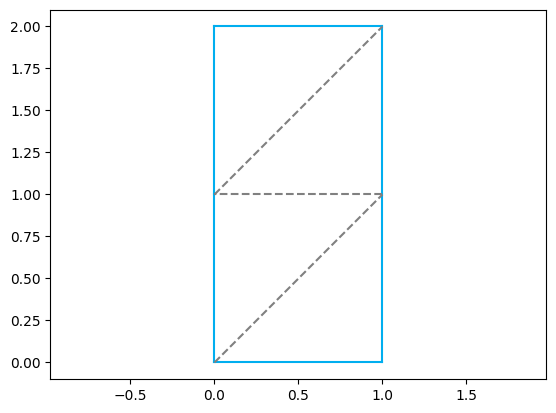

In [238]:
nums_perceptron = TwoLayerPerceptron(list(range(1, 11)), -1, w, b)
nums = data.iloc[:, :9].to_numpy()

build_plot(nums_perceptron.predict(nums[0]))